# **Árbol de Decisión**

```
Autor : Luis Beltran Palma Ttito
Lugar : Cusco, Perú, 2023.
Proposito : Árbol de Decisión en la clasificacion de data set de microorganismos con el metodo de arbol de decision
```

## **Árbol de Decisión**
Prueba de un árbol de decisión con el dataset de microorganismos.</br>
El criterio para la constrcción del árbol es el de gini con una profundidad considerable.</br>
Se incluye la etapa de test y predicción, así como el cálculo de las métricas respectivas.

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.tree import DecisionTreeClassifier

## **2. Leer datos**

In [2]:
datos = pd.read_csv('microorganismo.csv', sep=',')
datos.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800
0,134,136,138,139,140,142,144,146,146,148,...,129,127,126,125,123,122,121,120,118,Amoeba
1,6,6,8,8,9,11,12,16,22,20,...,70,65,63,44,29,16,15,25,29,Amoeba
2,101,123,106,115,80,82,66,102,152,81,...,34,33,33,33,33,33,34,33,31,Amoeba
3,156,157,158,158,156,154,153,156,155,154,...,146,145,146,146,147,146,148,147,147,Amoeba
4,128,128,128,128,128,127,128,127,128,127,...,209,209,209,209,209,209,209,211,243,Amoeba
5,205,205,204,204,205,206,206,209,204,204,...,227,227,228,230,233,229,214,217,212,Amoeba
6,152,152,153,153,154,155,155,155,156,156,...,140,140,138,136,135,135,135,135,135,Amoeba
7,117,116,116,116,116,117,117,117,117,118,...,113,118,117,117,117,116,116,117,117,Amoeba
8,104,104,104,104,104,104,105,105,104,105,...,102,98,98,103,104,91,82,94,95,Amoeba
9,130,129,128,131,134,131,134,135,134,134,...,106,107,107,107,107,107,107,108,107,Amoeba


## **3. Descripcion de datos**

In [3]:
# Estadisticos basicos por atributos
print(datos.describe())

                0           1           2           3           4           5  \
count  789.000000  789.000000  789.000000  789.000000  789.000000  789.000000   
mean   123.602028  123.893536  124.076046  124.539924  125.558935  127.115336   
std     82.970983   82.402527   81.977862   81.332338   80.327949   79.824876   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     48.000000   50.000000   50.000000   53.000000   59.000000   64.000000   
50%    130.000000  128.000000  128.000000  129.000000  131.000000  133.000000   
75%    189.000000  187.000000  187.000000  187.000000  187.000000  188.000000   
max    255.000000  255.000000  255.000000  255.000000  255.000000  255.000000   

                6           7           8           9  ...        4790  \
count  789.000000  789.000000  789.000000  789.000000  ...  789.000000   
mean   126.571610  126.740177  128.400507  128.069708  ...  131.525982   
std     79.858212   79.488512   79.126493   78.8

## **4. Distribucion de clases**

In [4]:
# Numero de registros por especie de iris
print(datos.groupby('4800').size())

4800
Amoeba                 72
Euglena               168
Hydra                  76
Paramecium            152
Rod_bacteria           85
Spherical_bacteria     86
Spiral_bacteria        75
Yeast                  75
dtype: int64


## **5. Separación de datos, para entrenamiento y test**

In [8]:
x = datos.drop(['4800'], axis = 1)
y = datos['4800']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5, train_size=0.8)

## **6. Entrenamiento de árbol de decisión**

In [16]:
# Crear el obj árbol de decisión
# HIPERPARAMETRO
#=========
# Indice de impuresa GINI: (criterion)
# Máxima profundidad del árbol: (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion='gini', max_depth=160)

# entrenar el árbol de decision
ArbolDecision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=160)

## **Test AD**

In [17]:
ArbolDecision.score(x_test, y_test)

0.21518987341772153

## **7. Gráfica de árbol de decisión**

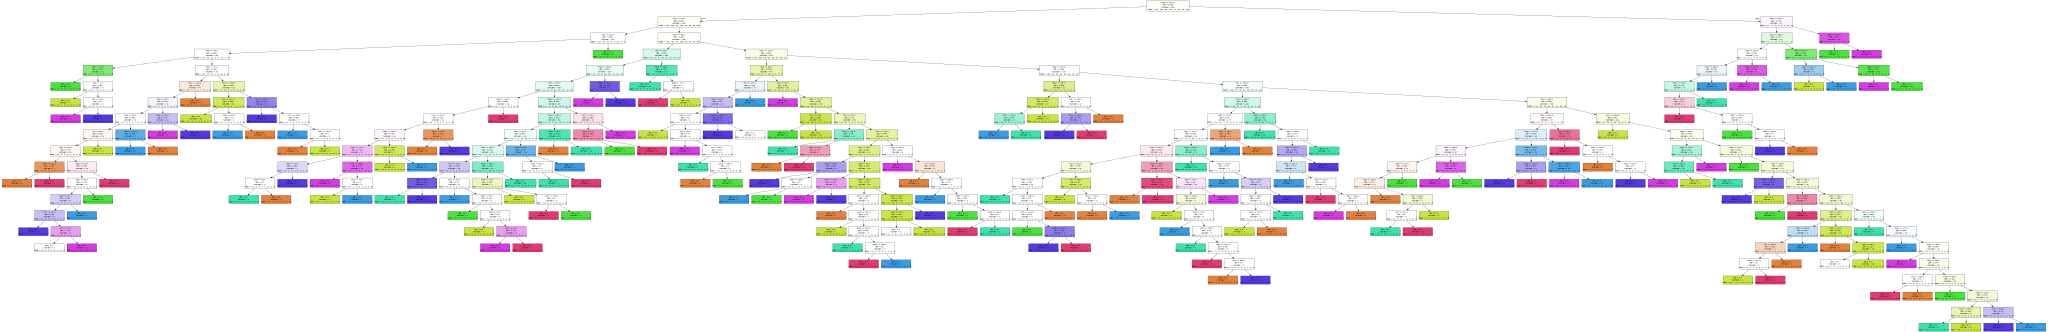

In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source # conda install -c conda-forge python-graphviz
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=x.columns, filled=True))
SVG(graph.pipe(format='svg'))

## **8. Test**

In [12]:
pred = ArbolDecision.predict(x_test)
print(pred)
print(y_test)

['Spherical_bacteria' 'Paramecium' 'Euglena' 'Amoeba' 'Paramecium'
 'Euglena' 'Paramecium' 'Rod_bacteria' 'Spherical_bacteria' 'Euglena'
 'Yeast' 'Yeast' 'Euglena' 'Paramecium' 'Euglena' 'Hydra'
 'Spherical_bacteria' 'Hydra' 'Amoeba' 'Spherical_bacteria' 'Paramecium'
 'Euglena' 'Rod_bacteria' 'Spherical_bacteria' 'Paramecium' 'Amoeba'
 'Paramecium' 'Amoeba' 'Amoeba' 'Yeast' 'Euglena' 'Euglena' 'Paramecium'
 'Amoeba' 'Spiral_bacteria' 'Paramecium' 'Amoeba' 'Spiral_bacteria'
 'Spherical_bacteria' 'Euglena' 'Spiral_bacteria' 'Hydra' 'Paramecium'
 'Hydra' 'Paramecium' 'Euglena' 'Spiral_bacteria' 'Hydra' 'Rod_bacteria'
 'Euglena' 'Spherical_bacteria' 'Euglena' 'Spiral_bacteria' 'Euglena'
 'Rod_bacteria' 'Euglena' 'Rod_bacteria' 'Euglena' 'Rod_bacteria'
 'Spiral_bacteria' 'Amoeba' 'Rod_bacteria' 'Paramecium' 'Rod_bacteria'
 'Paramecium' 'Amoeba' 'Paramecium' 'Rod_bacteria' 'Euglena' 'Euglena'
 'Amoeba' 'Yeast' 'Paramecium' 'Yeast' 'Euglena' 'Spiral_bacteria'
 'Spherical_bacteria' 'Spiral_bac

## **9. Matriz de confusión y métricas**

In [13]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[ 0  2  0  4  1  1  1  2]
 [ 6 12  0  4  1  3  1  2]
 [ 2  4  3  4  1  1  3  2]
 [ 7  7  2  9  2  4  3  5]
 [ 1  2  1  2  7  3  1  1]
 [ 2  4  2  1  3  2  4  1]
 [ 0  4  0  2  1  0  1  1]
 [ 1  4  0  3  4  1  0  0]]
Exactitud =  0.21518987341772153


## **10. Prediccion**

In [18]:
nuevo = np.array([[1.7, 0.3, 5.7, 3.8]])

pred = ArbolDecision.predict(nuevo)
print(pred)

['virginica']


c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
